In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
from pymongo import MongoClient
from tqdm import tqdm_notebook as tqdm

from src.config_tickets import ticket_lst
from src.scraping import WebScraping
from src.settings import HOST
from src.query_data import QueryData
from src.utilities import run_model_with_parameters, run_model_without_parameters
from Models.Lstm_geo_hybrid import GBM

from sklearn.metrics import mean_squared_error, mean_absolute_error

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Using TensorFlow backend.


In [3]:
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

from ipywidgets import interactive, widgets, RadioButtons, ToggleButton, Select, FloatSlider, FloatRangeSlider, IntSlider, fixed

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [4]:
def connect_2_dbServer():
    mongoClient = MongoClient(HOST)
    return mongoClient

In [5]:
client = connect_2_dbServer()
query = QueryData(client)

In [6]:
lst_ticket = query.get_list_ticket(index='VN 30 (VNI30)')
print(lst_ticket)
print(len(lst_ticket))

['Cotec Construction JSC', 'DHG Pharmaceutical JSC', 'Faros Construction Corp', 'FPT Corp', 'Gemadept Corp', 'Ho Chi Minh City Infrastructure Investment JSC', 'Ho Chi Minh City Development Joint Stock Commercial Bank', 'Hoa Phat Group JSC', 'Masan Group Corp', 'Military Commercial Joint Stock Bank', 'Mobile World Investment Corp', 'No Va Land Investment Group Corp', 'PetroVietnam Fertilizer and Chemicals Corp', 'Phu Nhuan Jewelry JSC', 'Refrigeration Electrical Engineering Corp', 'Sai Gon Thuong Tin Commercial Joint Stock Bank', 'Saigon Beer Alcohol Beverage Corp', 'Saigon Securities Incorporation', 'Vietnam Technological And Commercial Joint Stock Bank', 'Thanh Thanh Cong Tay Ninh JSC', 'Joint Stock Commercial Bank for Foreign Trade of Vietnam', 'Vietjet Aviation JSC', 'Vietnam Export Import Commercial Joint Stock Bank', 'Vietnam JSCmmercial Bank for Industry and Trade', 'Vietnam Prosperity Joint Stock Commercial Bank', 'Vietnam Dairy Products JSC', 'Vincom Retail JSC', 'Vingroup JSC'

['Cotec Construction JSC', 'DHG Pharmaceutical JSC', 'Faros Construction Corp', 'FPT Corp', 'Gemadept Corp']


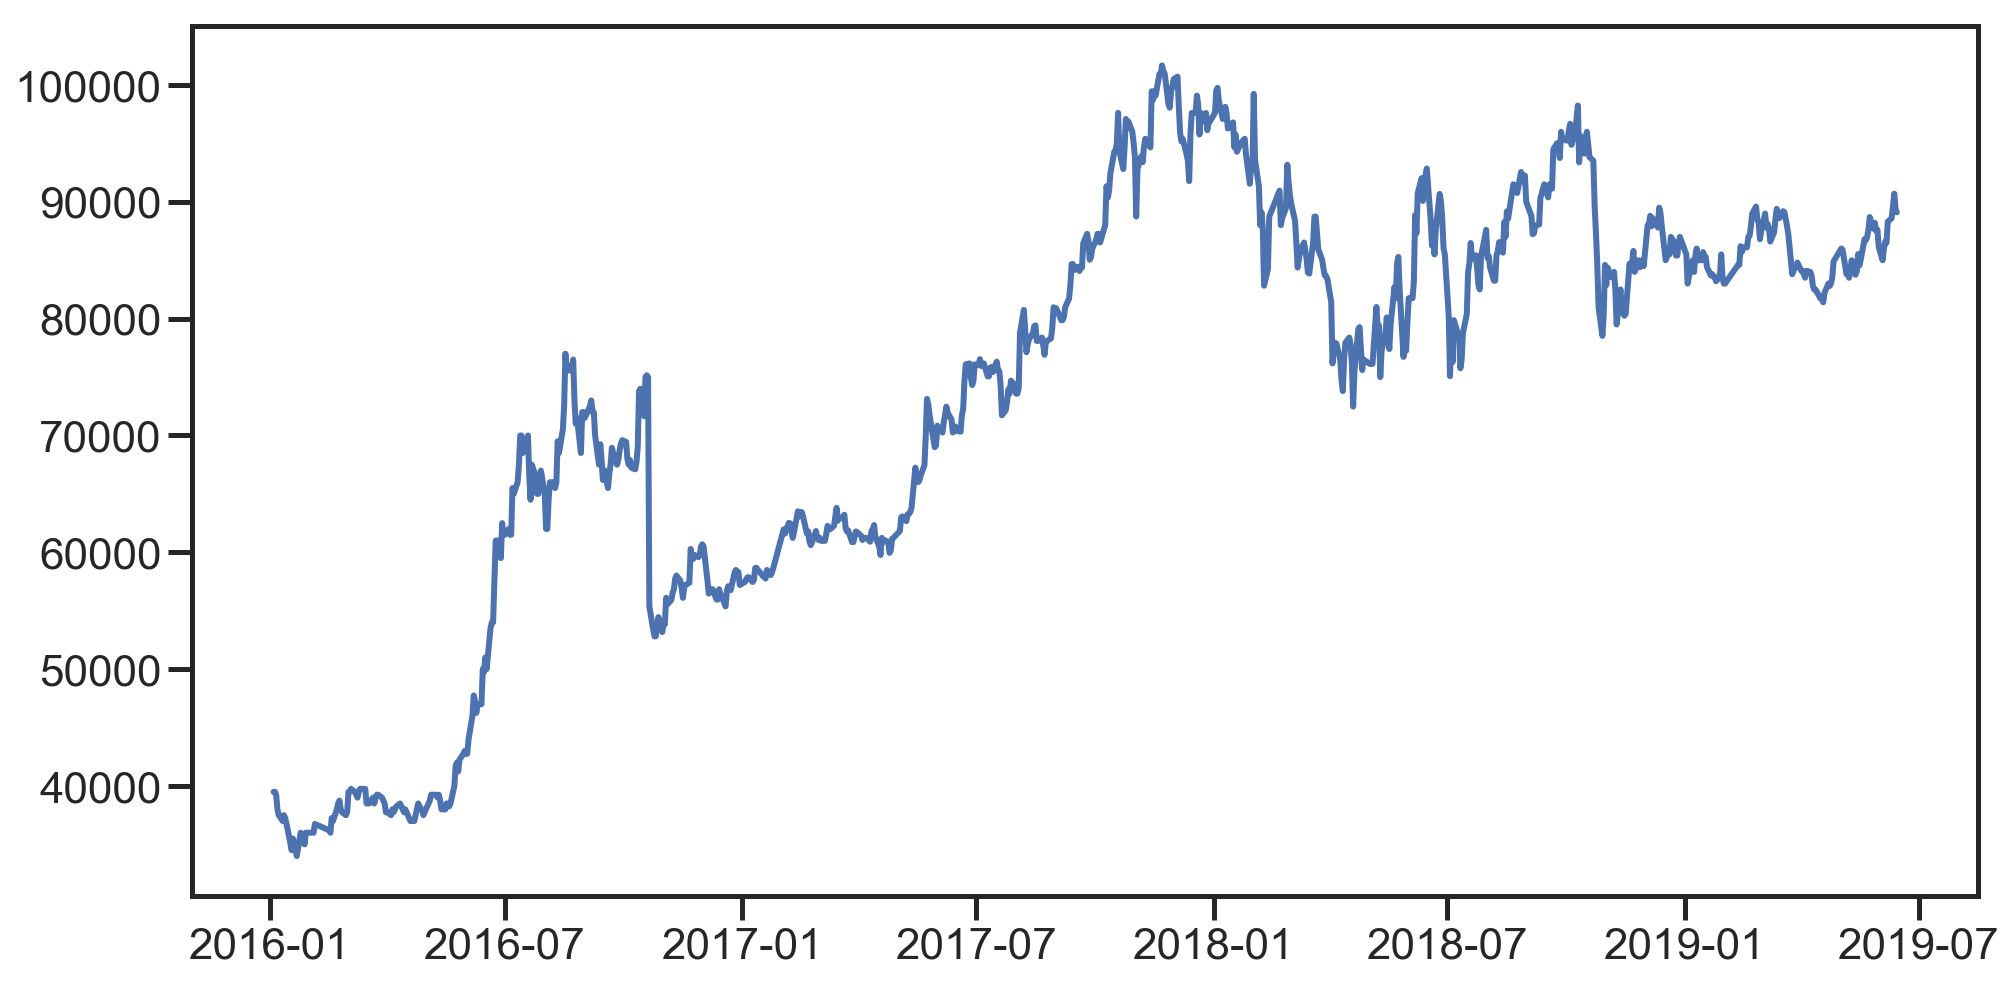

In [7]:
start = datetime(2016,1,1)
end = datetime(2019,1,1)

print(lst_ticket[:5])

df = query.get_historical_data(lst_ticket, start=start)
closed_price = dict()
for ticket in lst_ticket[3:10]:
    closed_price[ticket] = df[df.name == ticket]['close']

    
df.to_csv('historical_data.csv')
    
series = df[df.name == 'Mobile World Investment Corp']['close']
plt.figure(figsize=(16,8))
plt.plot(series)
plt.show()

## Plot ACF and PACF

In [8]:
from statsmodels.tsa.stattools import pacf, acf

def calculate_acf(time_series, lag=20, alpha=0.01):
    x = time_series.values
    acf_value, confint = acf(x, nlags=lag, alpha=alpha)
    confint_lower = confint[:, 0] - acf_value
    confint_upper = confint[:, 1] - acf_value
    return acf_value, confint_upper, confint_lower


def calculate_pacf(time_series, lag=20, alpha=0.01):
    x = time_series.values
    pacf_value, confint = pacf(x, nlags=lag, alpha=alpha)
    confint_lower = confint[:, 0] - pacf_value
    confint_upper = confint[:, 1] - pacf_value
    return pacf_value, confint_upper, confint_lower

def mean_absolute_percentage_error(y_true, y_pred):
    mean = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    std = np.std(np.abs((y_true - y_pred) / y_true) * 100)
    return mean, std


def root_mean_squared_error(y_true, y_pred):
    mean = np.sqrt(np.mean((y_true - y_pred) ** 2))
    std = np.sqrt(np.std((y_true - y_pred) ** 2))
    return mean, std

def evaluation(validation):
    mse = mean_squared_error(validation['y'], validation['yhat'])
    std_mse = np.std((validation['y'] - validation['yhat'])**2)
    rmse, std_rmse = root_mean_squared_error(validation['y'], validation['yhat'])
    mae = mean_absolute_error(validation['y'], validation['yhat'])
    std_mae = np.std(np.abs(validation['y'] - validation['yhat']))
    mape, std_mape = mean_absolute_percentage_error(validation['y'], validation['yhat'])
    result = {
        'mse': mse,
        'std_mse': std_mse,
        'rmse': rmse,
        'std_rmse': std_rmse,
        'mae': mae,
        'std_mae': std_mae,
        'mape': mape,
        'std_mape': std_mape,
    }
    return result

start_train = 0.5
end_train = 0.95

## Run model

### Run model without parameters

Phu Nhuan Jewelry JSC


non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enfo

non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enfo

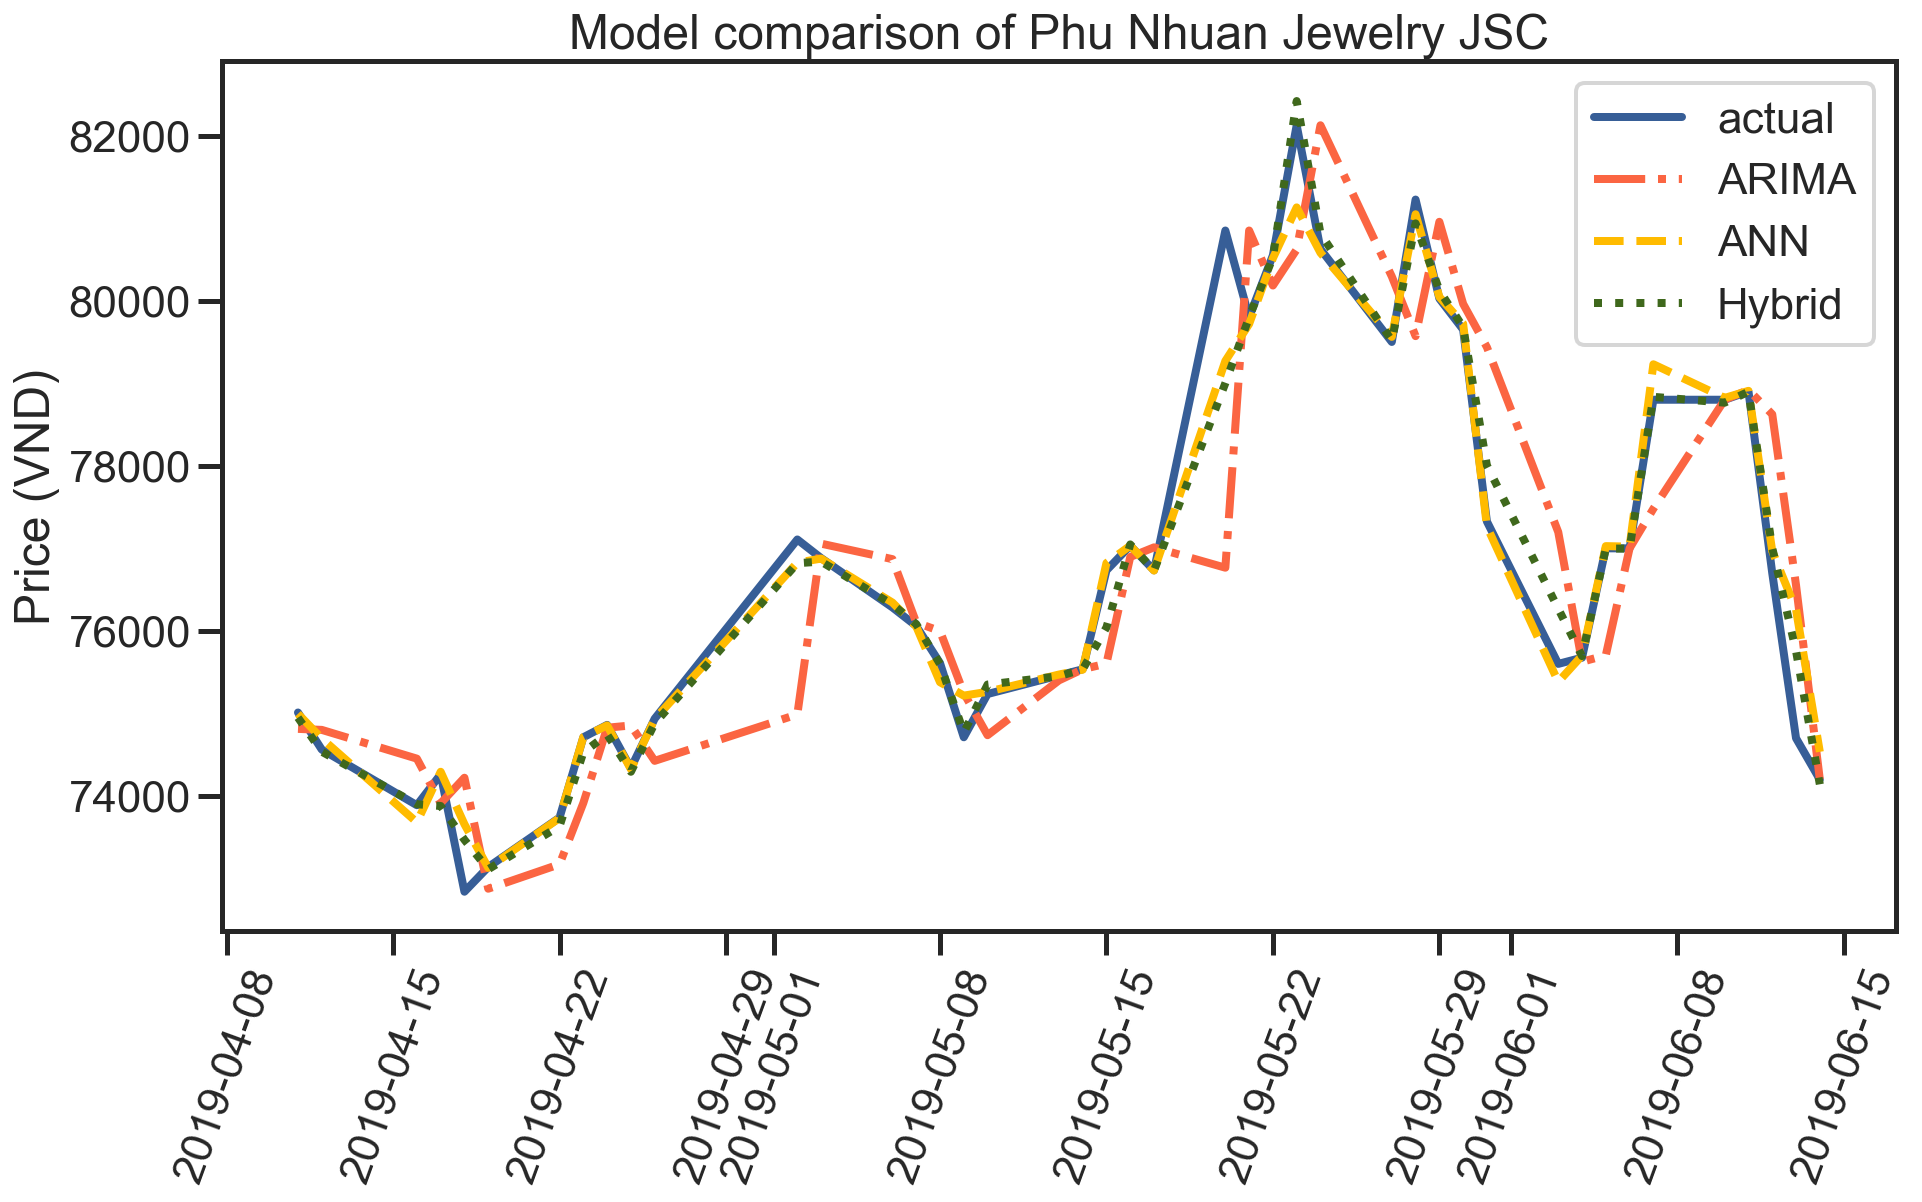

[{'ticket': 'Phu Nhuan Jewelry JSC', 'arima_mean_mape': 1.011610361617691, 'arima_min_mape': 0.0, 'arima_max_mape': 5.052266535069401, 'ann_mean_mape': 0.2563734239991282, 'ann_min_mape': 7.458128065484116e-05, 'ann_max_mape': 2.0867846451883123, 'hybrid_mean_mape': 0.2589291843051647, 'hybrid_min_mape': 0.001767808936782505, 'hybrid_max_mape': 2.286480845290469}]


In [17]:
lst_ticket_result = []
for ticket in lst_ticket[13:14]:
    print(ticket)
    time_series = df[df.name == ticket]['close']
    # split data
    time_series = time_series.sort_index()
    size = len(time_series)
    train_start = int(start_train * size)
    train_end = int(end_train * size)
    train, test = time_series[train_start:train_end], time_series[train_end:]
    
    ticket_result = {'ticket': ticket}
    
    lst_result_ann = run_model_without_parameters(train, test, model_selection='ANN')
    lst_result_arima = run_model_without_parameters(train, test, model_selection='ARIMA')
    lst_result_hybrid = run_model_without_parameters(train, test, model_selection='Hybrid')
    
    # ARIMA
    df_result_arima = pd.DataFrame()
    for result in lst_result_arima:
        df_result_arima[result['params']] = result['test_evaluation']
    mape_arima = df_result_arima.min(axis=1)
    ticket_result['arima_mean_mape'] = np.mean(mape_arima)
    ticket_result['arima_min_mape'] = np.min(mape_arima)
    ticket_result['arima_max_mape'] = np.max(mape_arima)
    df_yhat_arima = pd.DataFrame()
    for result in lst_result_arima:
        df_yhat_arima[result['params']] = result['yhat']
    
    lst_yhat = []
    yhat_idx = df_result_arima.idxmin(axis=1)
    for (index, row), col in zip(df_yhat_arima.iterrows(),yhat_idx):
        lst_yhat.append(row[col])
    yhat_arima = pd.Series(lst_yhat, index=test.index)
    
    # ANN
    df_result_ann = pd.DataFrame()
    for result in lst_result_ann:
        df_result_ann[result['params']] = result['test_evaluation']
    mape_ann = df_result_ann.min(axis=1)
    ticket_result['ann_mean_mape'] = np.mean(mape_ann)
    ticket_result['ann_min_mape'] = np.min(mape_ann)
    ticket_result['ann_max_mape'] = np.max(mape_ann)
    df_yhat_ann = pd.DataFrame()
    for result in lst_result_ann:
        df_yhat_ann[result['params']] = result['yhat']
    
    lst_yhat = []
    yhat_idx = df_result_ann.idxmin(axis=1)
    for (index, row), col in zip(df_yhat_ann.iterrows(),yhat_idx):
        lst_yhat.append(row[col])
    yhat_ann = pd.Series(lst_yhat, index=test.index)
    
    # Hybrid
    df_result_hybrid = pd.DataFrame()
    for result in lst_result_hybrid:
        df_result_hybrid[result['params']] = result['test_evaluation']
    mape_hybrid = df_result_hybrid.min(axis=1)
    ticket_result['hybrid_mean_mape'] = np.mean(mape_hybrid)
    ticket_result['hybrid_min_mape'] = np.min(mape_hybrid)
    ticket_result['hybrid_max_mape'] = np.max(mape_hybrid)
    df_yhat_hybrid = pd.DataFrame()
    for result in lst_result_hybrid:
        df_yhat_hybrid[result['params']] = result['yhat']
    
    lst_yhat = []
    yhat_idx = df_result_hybrid.idxmin(axis=1)
    for (index, row), col in zip(df_yhat_hybrid.iterrows(),yhat_idx):
        lst_yhat.append(row[col])
    yhat_hybrid = pd.Series(lst_yhat, index=test.index)
    
    lst_ticket_result.append(ticket_result)
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    ax1.plot(test, c='#375E97', ls='-', linewidth=4, alpha=1)
    ax1.plot(yhat_arima, c='#FB6542', ls='-.', linewidth=4)
    ax1.plot(yhat_ann, c='#FFBB00', ls='--', linewidth=4)
    ax1.plot(yhat_hybrid, c='#3F681C', ls=':', linewidth=4)
    plt.xticks(rotation=70)
    plt.ylabel('Price (VND)')
    plt.legend(['actual','ARIMA', 'ANN', 'Hybrid'])
    plt.title('Model comparison of ' + ticket)
    plt.show()
    
print(lst_ticket_result)

In [16]:
df = pd.DataFrame(lst_ticket_result).round(4)
df = df.set_index('ticket')
df.head()

,ann_max_mape,ann_mean_mape,ann_min_mape,arima_max_mape,arima_mean_mape,arima_min_mape,hybrid_max_mape,hybrid_mean_mape,hybrid_min_mape
ticket,,,,,,,,,
Cotec Construction JSC,2.06930,0.16040,0.00160,3.65160,0.58570,0.00000,0.85250,0.11980,0.00310
DHG Pharmaceutical JSC,0.45850,0.09570,0.00340,2.22260,0.70670,0.00000,0.75870,0.08520,0.00040
Faros Construction Corp,1.93420,0.25240,0.00080,5.85330,1.11890,0.00000,1.51470,0.18410,0.00340
FPT Corp,0.61040,0.09610,0.00130,2.26570,0.74110,0.00000,0.44050,0.07310,0.00150
Gemadept Corp,0.68900,0.08700,0.00110,3.25200,0.46530,0.00000,0.53550,0.10010,0.00280


In [18]:
df[['arima_mean_mape','ann_mean_mape','hybrid_mean_mape']].to_csv('result_mean.csv')

In [19]:
df[['arima_min_mape','arima_max_mape','ann_min_mape','ann_max_mape','hybrid_min_mape','hybrid_max_mape']].to_csv('result_range.csv')